# Step 1. Exploratory Data Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read the .csv files into two seperate dataframes for analysis
testDF = pd.read_csv("test.csv")
trainDF = pd.read_csv("train.csv")

In [2]:
# Train Data 
trainDF.head(10)

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."
5,5,0,@Kwesidei not the whole crew
6,6,0,Need a hug
7,7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,8,0,@Tatiana_K nope they didn't have it
9,9,0,@twittera que me muera ?


In [3]:
# Test Data 
testDF.head(10)

,Index,Sentiment,Text
0,0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,1,Reading my kindle2... Love it... Lee childs i...
2,2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary You'll love your Kindle2. I've had...
4,4,1,@mikefish Fair enough. But i have the Kindle2...
5,5,1,@richardebaker no. it is too big. I'm quite ha...
6,6,0,Fuck this economy. I hate aig and their non lo...
7,7,1,Jquery is my new best friend.
8,8,1,Loves twitter
9,9,1,how can you not love Obama? he makes jokes abo...


In [4]:
# Train Information
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Index      1048575 non-null  int64 
 1   Sentiment  1048575 non-null  int64 
 2   Text       1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
# Test Information
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      359 non-null    int64 
 1   Sentiment  359 non-null    int64 
 2   Text       359 non-null    object
dtypes: int64(2), object(1)
memory usage: 8.5+ KB


### Both train.csv and test.csv contain text and their sentiemtents. 
### Also, no data is missing or emtpy

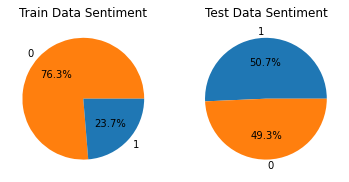

In [6]:
# Looking at sentiment information

fig, axs = plt.subplots(1, 2)


# Test data
test_sentiment = testDF["Sentiment"].value_counts()


#Train data
train_sentiment = trainDF["Sentiment"].value_counts()

axs[0].pie(train_sentiment, labels = train_sentiment.index, autopct = '%1.1f%%',
           colors = ['tab:orange', 'tab:blue'])
axs[0].set_title("Train Data Sentiment")

axs[1].pie(test_sentiment, labels = test_sentiment.index, autopct = '%1.1f%%',
           colors = ['tab:blue', 'tab:orange'])
axs[1].set_title("Test Data Sentiment")


plt.show()

### The training data is heavly skewed to the negative (0) while the testing data is evenly distributed positive (1) and negative (0).

# Step 2: Text Preprocessing

## The testing data is too large to compute feature vectors of later and there are more negative entries then positive
## To fix this, we take 0.1% of the data, with an even distribution of negative and positive entries

In [7]:
negDF = trainDF[0:800000]
posDF = trainDF[800000:1048575]

# 10% of the data is 10486 entries, 5243 entries for each
negDF = negDF.sample(n = 524)
posDF = posDF.sample(n = 524)

trainDF = pd.concat([negDF, posDF], ignore_index = True)
print(trainDF.head(5))
print(trainDF.tail(5))

    Index  Sentiment                                               Text
0  486673          0  @taranwalker Thank you, but there's nothing th...
1  431061          0  @leeyanabelle ohh okay...  bah. see you on tue...
2  417718          0  And the bullshit continues. This birthday was ...
3  547421          0  @Katchin05 LOLOLOL haha that sux to LOOK like ...
4  636130          0                                       ugh damn it 
        Index  Sentiment                                               Text
1043  1035052          1  @AKathBilsky lol was totally kidding! ggeezzz ...
1044   854790          1                                        @dr3do yep 
1045   831184          1  is up and excited for her bday surprise after ...
1046   890400          1  @_Flik_ hehe not too bad. Spent a lot of it ty...
1047   868867          1                             A spot of dim sum now 


In [8]:
import re
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import numpy as np


# Put training values in an array
trainTest = trainDF["Text"].values


corpus = []

for i in range(len(trainTest)):
    temp_text = trainTest[i]
# 1. remove url's 
    temp_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b',
                          '', temp_text)
    
# 2. remove user references (@username)
    temp_text = re.sub(r'(@){1,1}(\w)*\b',
                          '', temp_text)
    
# 3. remove "&[a-zA-Z]", common occurrence
    temp_text = re.sub(r'&\b[a-zA-Z]*\b', 
                          ' ', temp_text)
    
# 4. change all characters to lowercase
    temp_text = temp_text.lower()
    
# 5. change contractions
    temp_text = re.sub(r"won\'t", "will not", temp_text)
    temp_text = re.sub(r"can\'t", "can not", temp_text)
    temp_text = re.sub(r"n\'t", " not", temp_text)
    temp_text = re.sub(r"\'re", " are", temp_text)
    temp_text = re.sub(r"\'s", " is", temp_text)
    temp_text = re.sub(r"\'d", " would", temp_text)
    temp_text = re.sub(r"\'ll", " will", temp_text)
    temp_text = re.sub(r"\'t", " not", temp_text)
    temp_text = re.sub(r"\'ve", " have", temp_text)
    temp_text = re.sub(r"\'m", " am", temp_text)
# 6. remove special characters and numbers
    temp_text = re.sub('[^a-z<>]',
                          ' ', temp_text)
# 7. remove single characters
    temp_text = re.sub(r'\b[a-z]{1,1}\b',
                          '', temp_text)
# 8. shrink whitespace
    temp_text = re.sub(r'[\b\s\b]+',
                          ' ', temp_text)
    temp_text = re.sub(r'^[\b\s\b]+',
                          '', temp_text)
    temp_text = re.sub(r'[\b\s\b]+$',
                          '', temp_text)


    testWords = word_tokenize(temp_text)

# 9. Stem words to reduce vocabulary
    stemmer = SnowballStemmer("english")

    temp_sentence = []
    for word in testWords:
        stemmed_word = stemmer.stem(word)
        temp_sentence.append(stemmed_word)
    
    corpus.append(temp_sentence)



In [9]:
# Example of a transformed example

print(trainTest[3])
print(corpus[3])

print(trainTest[1047])
print(corpus[1047])

@Katchin05 LOLOLOL haha that sux to LOOK like u got all types of STDS dangsggg 
['lololol', 'haha', 'that', 'sux', 'to', 'look', 'like', 'got', 'all', 'type', 'of', 'stds', 'dangsggg']
A spot of dim sum now 
['spot', 'of', 'dim', 'sum', 'now']


# Step 3: Linguistic Feature Extraction

## Bag of Words

In [45]:
# Array to hold final result, each entry will be another array, representing
# the features for an individual example
bag_of_words = []

# Dictionary to track and count unique words
word2Count = {}

for text in corpus:
    for word in text:
        if word not in word2Count.keys():
            word2Count[word] = 1
        else:
            word2Count[word] += 1
        
unique_words = list(word2Count.keys())

print(len(unique_words))

2587


### The bag_of_words feature vector has over 10,000 unique words.
### It is likely that many of these unique words are not necessary.
### We can take the most common words to reduce the training size.

In [59]:
from heapq import nlargest

# We will take the 1000 most common words
N = 1000

unique_words = nlargest(N, word2Count, key = word2Count.get)

word2Count = {}

In [12]:
# Now with the unique words we will use, we can construct
# the bag_of_words matrix

for text in corpus:
    bag_vector = np.zeros(len(unique_words))
    for word in text:
        # For each unique word, check if the current word is included
        for i, w in enumerate(unique_words):
            if word == w:
                bag_vector[i] += 1
                break
    bag_of_words.append(bag_vector)

# bag of words feature vector for the first text
bag_of_words[0]

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0.

## TF*IDF

In [13]:
# to calculate the TF*IDF, total number of elements in the document 
# and total number of unique words

n_docs = len(corpus)
n_unique_words = len(unique_words)

# a table to hold the term frequency of each word (columns) in each sentence (row)
# each cell is set to zero and will remain zero if the word doesn't appear in a
# given sentence
df_tf = pd.DataFrame(np.zeros((n_docs, n_unique_words)), columns = unique_words)

# Calcualte TF = # of word occurence / # of total words in sentence
for i, text in enumerate(corpus):
     for word in text:
        if word in unique_words:
            # each time word is a unique word, add 1/len(text) to the cell
            df_tf[word][i] += (1/len(text))
        
df_tf.head(1)

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Inverse Document Frequency = log(# of sentences (n_docs) / # of sentences 
# key: word / value: sentence count                         with a given word) 
idf = {}

# for each unique word
for w in unique_words:
    k = 0
    # for each sentence
    for text in corpus:
        # is the word in the sentence
        if w in text:
            k += 1
    
    idf[w] = np.log10(n_docs / k)
    
# combine tf and idf by multiplying the df_tf dataframe by the idf of each
# respecitve column name


for word in unique_words:
    for i, text in enumerate(corpus):
        df_tf[word][i] = df_tf[word][i] * idf[word]
        
df_tf.head(1)

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.0,0.0,0.034271,0.0,0.041845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 4: Classification Model

## First we find the most effective linguistic feature for logistic regression

In [20]:
trainDF.drop("Text", axis = 1, inplace = True)

KeyError: "['Text'] not found in axis"

### Need to make the bag of words vectors into a dataframe

In [21]:
BOWDF = pd.DataFrame(bag_of_words, columns = unique_words)
BOWDF.head()

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
trainDF_BOW = pd.concat([trainDF, BOWDF], axis = 1)
trainDF_BOW.head()

,Index,Sentiment,the,to,is,it,you,not,my,and,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,486673,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,431061,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,417718,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,547421,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,636130,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
trainDF_TFIDF = pd.concat([trainDF, df_tf], axis = 1)
trainDF_TFIDF.head()

,Index,Sentiment,the,to,is,it,you,not,my,and,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,486673,0,0.000000,0.000000,0.034271,0.000000,0.041845,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,431061,0,0.000000,0.000000,0.000000,0.000000,0.056789,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,417718,0,0.031845,0.000000,0.000000,0.000000,0.000000,0.0,0.087768,0.045803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,547421,0,0.000000,0.046185,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,636130,0,0.000000,0.000000,0.000000,0.246443,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y = trainDF["Sentiment"]
x_BOW = BOWDF
x_TFIDF = df_tf

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.000000,0.000000,0.034271,0.000000,0.041845,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.056789,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.031845,0.000000,0.000000,0.000000,0.000000,0.0,0.087768,0.045803,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.046185,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.246443,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.linear_model import LogisticRegression

# Trains two seperate logistic classifiers with the two different feature vectors
lc_BOW = LogisticRegression()
lc_TFIDF = LogisticRegression()

lc_BOW.fit(x_BOW, y)
lc_TFIDF.fit(x_TFIDF, y)

LogisticRegression()

### To test these classifiers, the test data needs to be processed and its feature's extracted

In [65]:
# Put testing values in an array
testArray = testDF["Text"].values


corpusTest = []

for i in range(len(testArray)):
    temp_text = testArray[i]
# 1. remove url's 
    temp_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b',
                          '', temp_text)
    
# 2. remove user references (@username)
    temp_text = re.sub(r'(@){1,1}(\w)*\b',
                          '', temp_text)
    
# 3. remove "&[a-zA-Z]", common occurrence
    temp_text = re.sub(r'&\b[a-zA-Z]*\b', 
                          ' ', temp_text)
    
# 4. change all characters to lowercase
    temp_text = temp_text.lower()
    
# 5. change contractions
    temp_text = re.sub(r"won\'t", "will not", temp_text)
    temp_text = re.sub(r"can\'t", "can not", temp_text)
    temp_text = re.sub(r"n\'t", " not", temp_text)
    temp_text = re.sub(r"\'re", " are", temp_text)
    temp_text = re.sub(r"\'s", " is", temp_text)
    temp_text = re.sub(r"\'d", " would", temp_text)
    temp_text = re.sub(r"\'ll", " will", temp_text)
    temp_text = re.sub(r"\'t", " not", temp_text)
    temp_text = re.sub(r"\'ve", " have", temp_text)
    temp_text = re.sub(r"\'m", " am", temp_text)
# 6. remove special characters and numbers
    temp_text = re.sub('[^a-z<>]',
                          ' ', temp_text)
# 7. remove single characters
    temp_text = re.sub(r'\b[a-z]{1,1}\b',
                          '', temp_text)
# 8. shrink whitespace
    temp_text = re.sub(r'[\b\s\b]+',
                          ' ', temp_text)
    temp_text = re.sub(r'^[\b\s\b]+',
                          '', temp_text)
    temp_text = re.sub(r'[\b\s\b]+$',
                          '', temp_text)


    testWords = word_tokenize(temp_text)

# 9. Stem words to reduce vocabulary
    stemmer = SnowballStemmer("english")

    temp_sentence = []
    for word in testWords:
        stemmed_word = stemmer.stem(word)
        temp_sentence.append(stemmed_word)
    
    corpusTest.append(temp_sentence)


In [66]:
bag_of_words_test = []

In [67]:
for text in corpusTest:
    bag_vector = np.zeros(len(unique_words))
    for word in text:
        # For each unique word, check if the current word is included
        for i, w in enumerate(unique_words):
            if word == w:
                bag_vector[i] += 1
                break
    bag_of_words_test.append(bag_vector)

In [68]:
n_docs = len(corpusTest)
n_unique_words = len(unique_words)

df_tf_test = pd.DataFrame(np.zeros((n_docs, n_unique_words)), columns = unique_words)

for i, text in enumerate(corpusTest):
     for word in text:
        if word in unique_words:
            # each time word is a unique word, add 1/len(text) to the cell
            df_tf_test[word][i] += (1/len(text))
        
df_tf_test.head(1)

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.117647,0.0,0.117647,0.058824,0.0,0.058824,0.058824,0.0,0.058824,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
idf = {}

# for each unique word
for w in unique_words:
    k = 0
    # for each sentence
    for text in corpusTest:
        # is the word in the sentence
        if w in text:
            k += 1
    if k != 0:
        idf[w] = np.log10(n_docs / k)
    else:
        idf[w] = 0
    
for word in unique_words:
    for i, text in enumerate(corpusTest):
        df_tf_test[word][i] = df_tf_test[word][i] * idf[word]
        
df_tf_test.head(1)

,the,to,is,it,you,not,my,and,in,for,...,peep,bgt,repeat,divers,musta,bollox,paid,pcl,prove,flaki
0,0.047389,0.0,0.054314,0.042505,0.0,0.051403,0.048394,0.0,0.054213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
test_BOWDF = pd.DataFrame(bag_of_words_test, columns = unique_words)

In [76]:
y_test = testDF['Sentiment']
x_test_BOW = test_BOWDF
x_test_TFIDF = df_tf_test

In [77]:
y_lc_predicted_BOW = lc_BOW.predict(x_test_BOW)
y_lc_pred_proba_BOW = lc_BOW.predict_proba(x_test_BOW)

y_lc_predicted_TFIDF = lc_TFIDF.predict(x_test_TFIDF)
y_lc_pred_proba_TFIDF = lc_TFIDF.predict_proba(x_test_TFIDF)

In [79]:
print(y_lc_predicted_BOW)
print(y_lc_pred_proba_BOW)

[0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0]
[[0.70067954 0.29932046]
 [0.13070439 0.86929561]
 [0.30363165 0.69636835]
 [0.36883916 0.63116084]
 [0.57947446 0.42052554]
 [0.45296206 0.54703794]
 [0.65931614 0.34068386]
 [0.28880238 0.71119762]
 [0.1254955  0.8745045 ]
 [0.24045816 0.75954184]
 [0.90890082 0.091099

In [80]:
print(y_lc_predicted_TFIDF)
print(y_lc_pred_proba_TFIDF)

[0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0]
[[0.53059902 0.46940098]
 [0.43136876 0.56863124]
 [0.48663657 0.51336343]
 [0.46481117 0.53518883]
 [0.51516256 0.48483744]
 [0.47018056 0.52981944]
 [0.50154013 0.49845987]
 [0.49434992 0.50565008]
 [0.25920808 0.74079192]
 [0.46989609 0.53010391]
 [0.53512533 0.464874

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

print(classification_report(y_test, y_lc_predicted_BOW))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       177
           1       0.66      0.75      0.70       182

    accuracy                           0.68       359
   macro avg       0.68      0.68      0.68       359
weighted avg       0.68      0.68      0.68       359



Text(0.5, 1.0, 'Logistic Regression BOW Confusion Matrix')

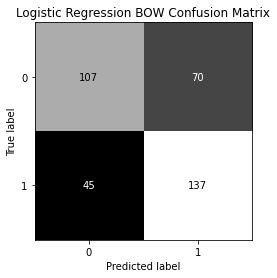

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_lc_predicted_BOW))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Logistic Regression BOW Confusion Matrix")

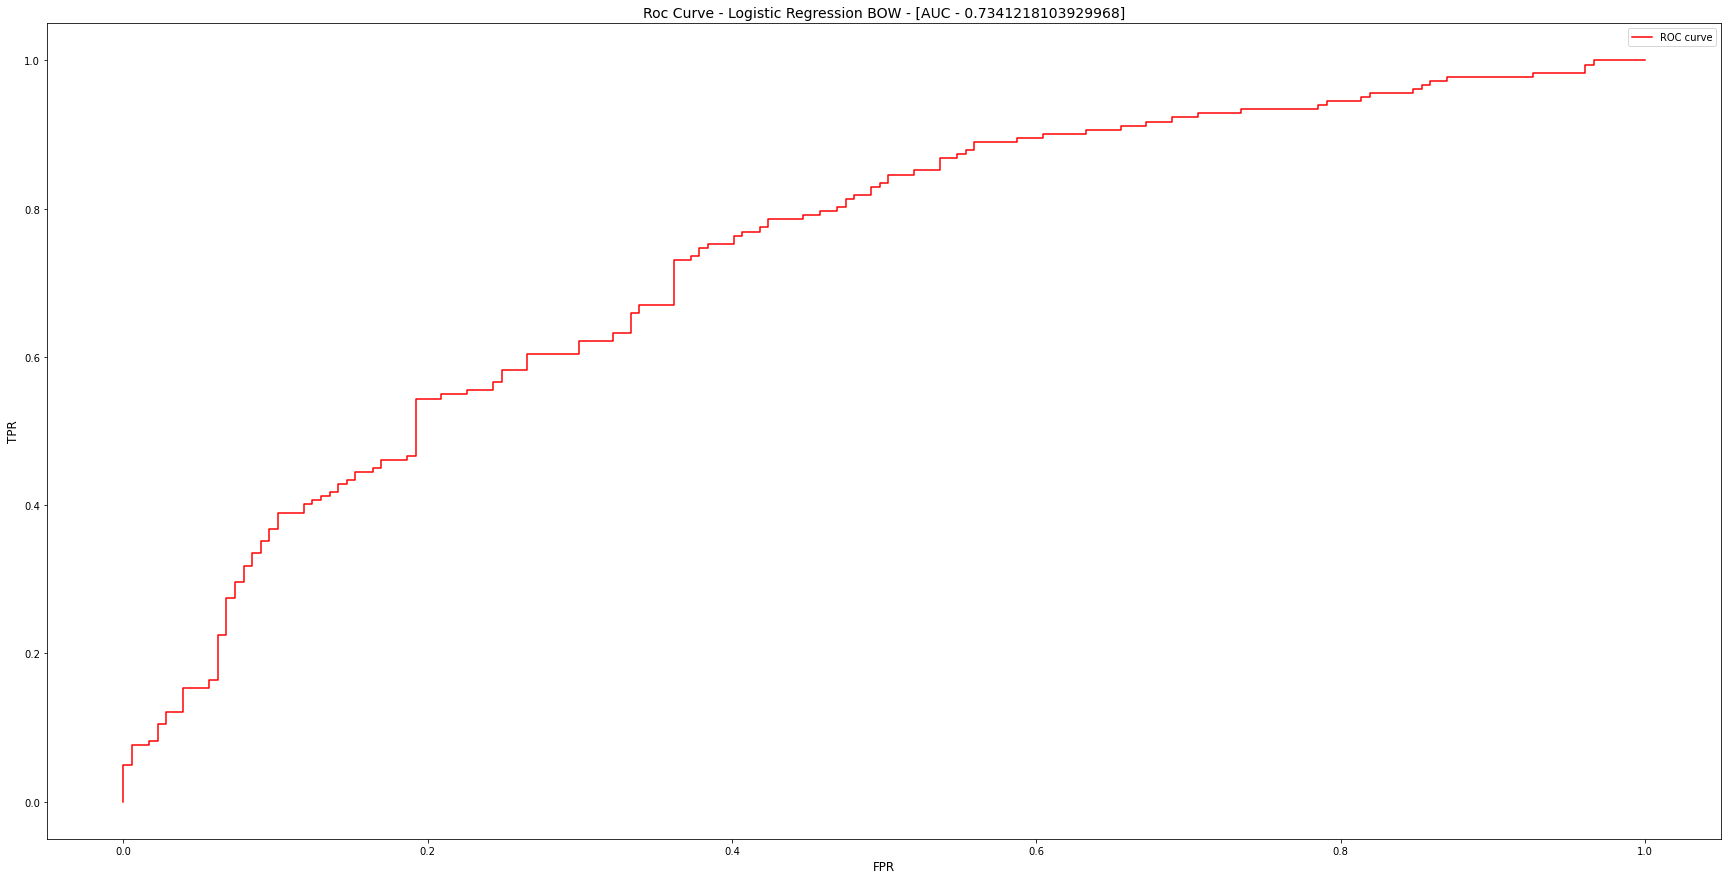

In [87]:
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_lc_pred_proba_BOW[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Logistic Regression BOW - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

In [84]:
print(classification_report(y_test, y_lc_predicted_TFIDF))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       177
           1       0.67      0.62      0.64       182

    accuracy                           0.65       359
   macro avg       0.65      0.65      0.65       359
weighted avg       0.65      0.65      0.65       359



Text(0.5, 1.0, 'Logistic Regression TFIDF Confusion Matrix')

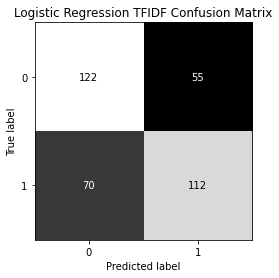

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_lc_predicted_TFIDF))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Logistic Regression TFIDF Confusion Matrix")

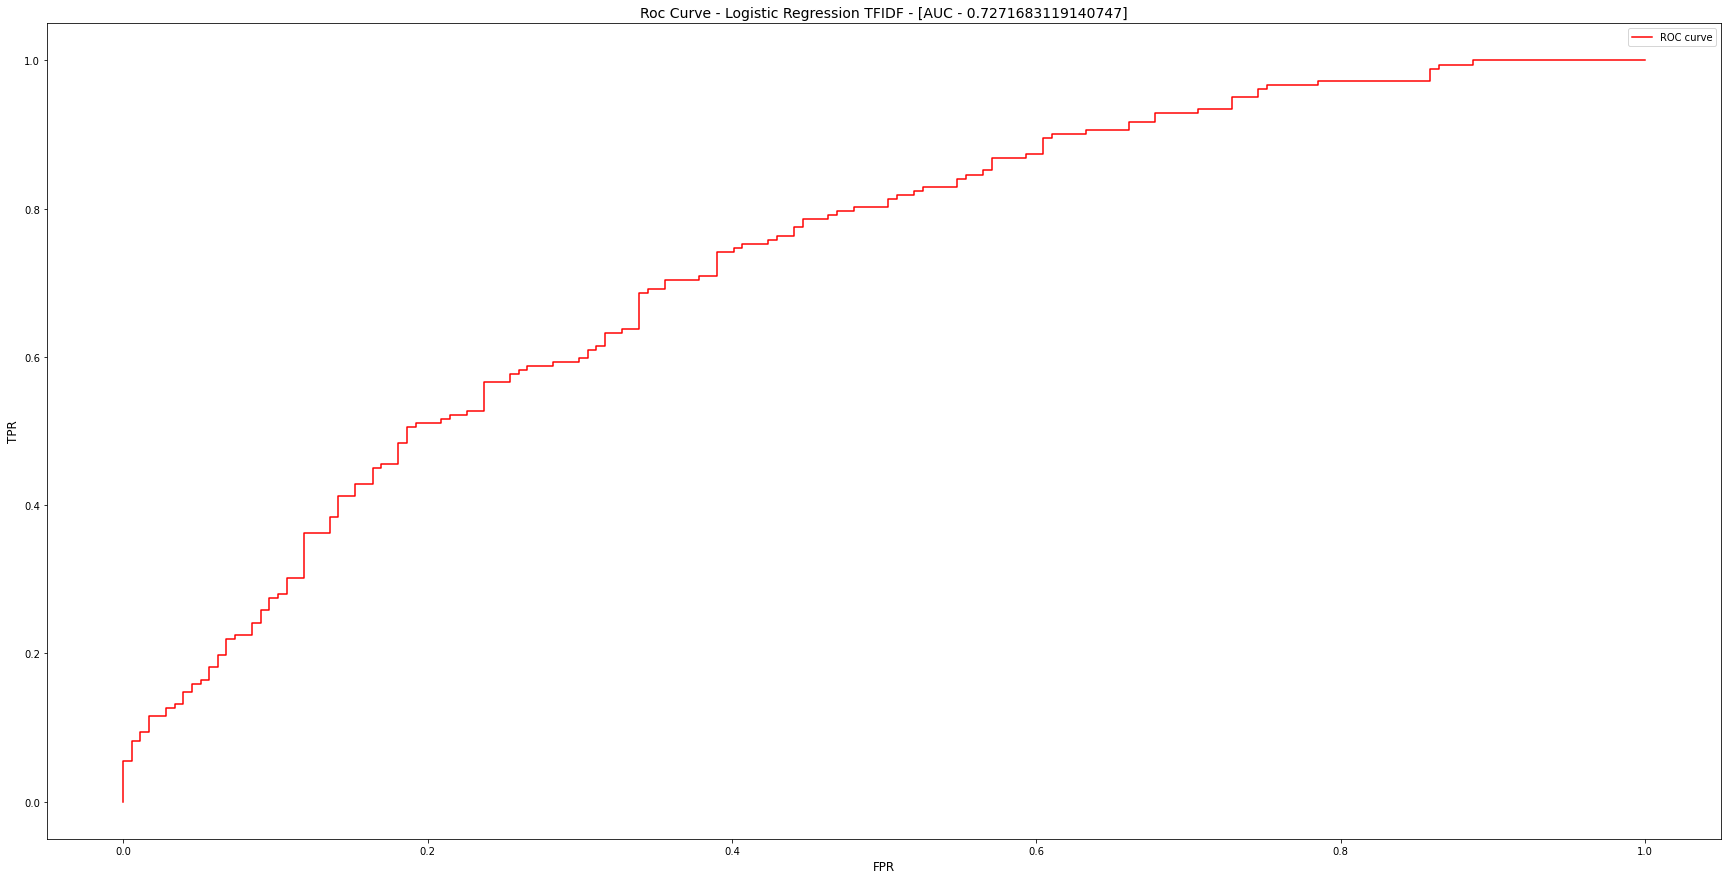

In [88]:
# ROC Curve Plot
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_lc_pred_proba_TFIDF[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Logistic Regression TFIDF - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

## BOW's accuracy and AUC are highter, so it will be used to train an SVM, Naive Bayes, and Random Forrest classifiers

In [90]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_BOW, y)

y_svc_predicted = svc.predict(x_test_BOW)

y_svc_pred_proba = svc.predict_proba(x_test_BOW)

print(y_svc_predicted)
print(y_svc_pred_proba)

[0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1]
[[0.70936769 0.29063231]
 [0.18827683 0.81172317]
 [0.30738523 0.69261477]
 [0.3498072  0.6501928 ]
 [0.47566928 0.52433072]
 [0.28151928 0.71848072]
 [0.33395756 0.66604244]
 [0.53934826 0.46065174]
 [0.10510437 0.89489563]
 [0.39032491 0.60967509]
 [0.72692211 0.273077

In [91]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_BOW, y)

y_nbc_predicted = nbc.predict(x_test_BOW)

y_nbc_pred_proba = nbc.predict_proba(x_test_BOW)

print(y_nbc_predicted)
print(y_nbc_pred_proba)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]
[[2.36277887e-140 1.00000000e+000]
 [5.64891732e-070 1.00000000e+000]
 [3.47205981e-152 1.00000000e+000]
 [9.85128584e-159 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [2.66014763e-112 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [3.77868841e-110 1.000000

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_BOW, y)

y_rfc_predicted = rfc.predict(x_test_BOW)

y_rfc_pred_proba = rfc.predict_proba(x_test_BOW)

print(y_rfc_predicted)
print(y_rfc_pred_proba)

[0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0]
[[0.79       0.21      ]
 [0.25       0.75      ]
 [0.32333333 0.67666667]
 [0.38       0.62      ]
 [0.61       0.39      ]
 [0.41       0.59      ]
 [0.66       0.34      ]
 [0.4        0.6       ]
 [0.19423016 0.80576984]
 [0.5        0.5       ]
 [0.67       0.33    

# Step 5: Model Evaluation

## Random Forest Evaluation is given above
## SVM Evaluation

In [93]:
print(classification_report(y_test, y_svc_predicted))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       177
           1       0.65      0.78      0.71       182

    accuracy                           0.67       359
   macro avg       0.68      0.67      0.67       359
weighted avg       0.68      0.67      0.67       359



Text(0.5, 1.0, 'Support Vector Confusion Matrix')

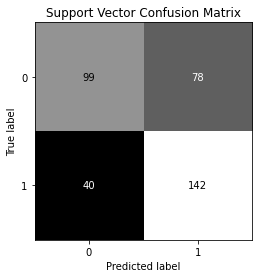

In [94]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_svc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Support Vector Confusion Matrix")

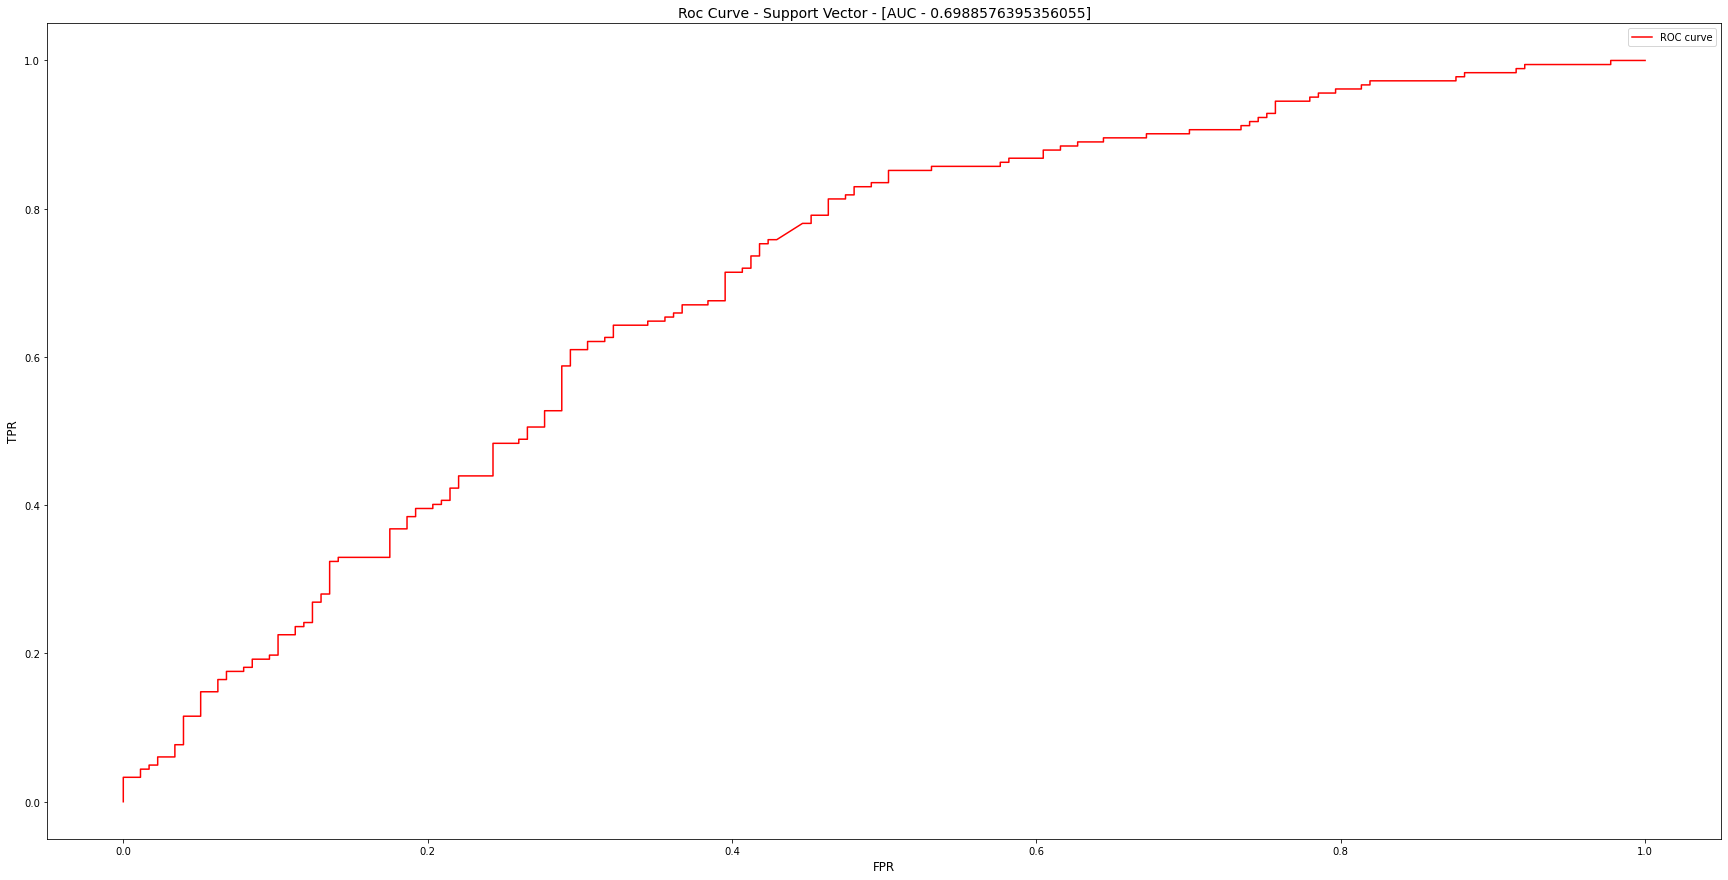

In [95]:
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_svc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Support Vector - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

## Naive Bayes

In [96]:
print(classification_report(y_test, y_nbc_predicted))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51       177
           1       0.59      0.85      0.70       182

    accuracy                           0.63       359
   macro avg       0.65      0.62      0.61       359
weighted avg       0.65      0.63      0.61       359



Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

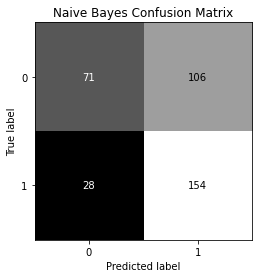

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_nbc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Naive Bayes Confusion Matrix")

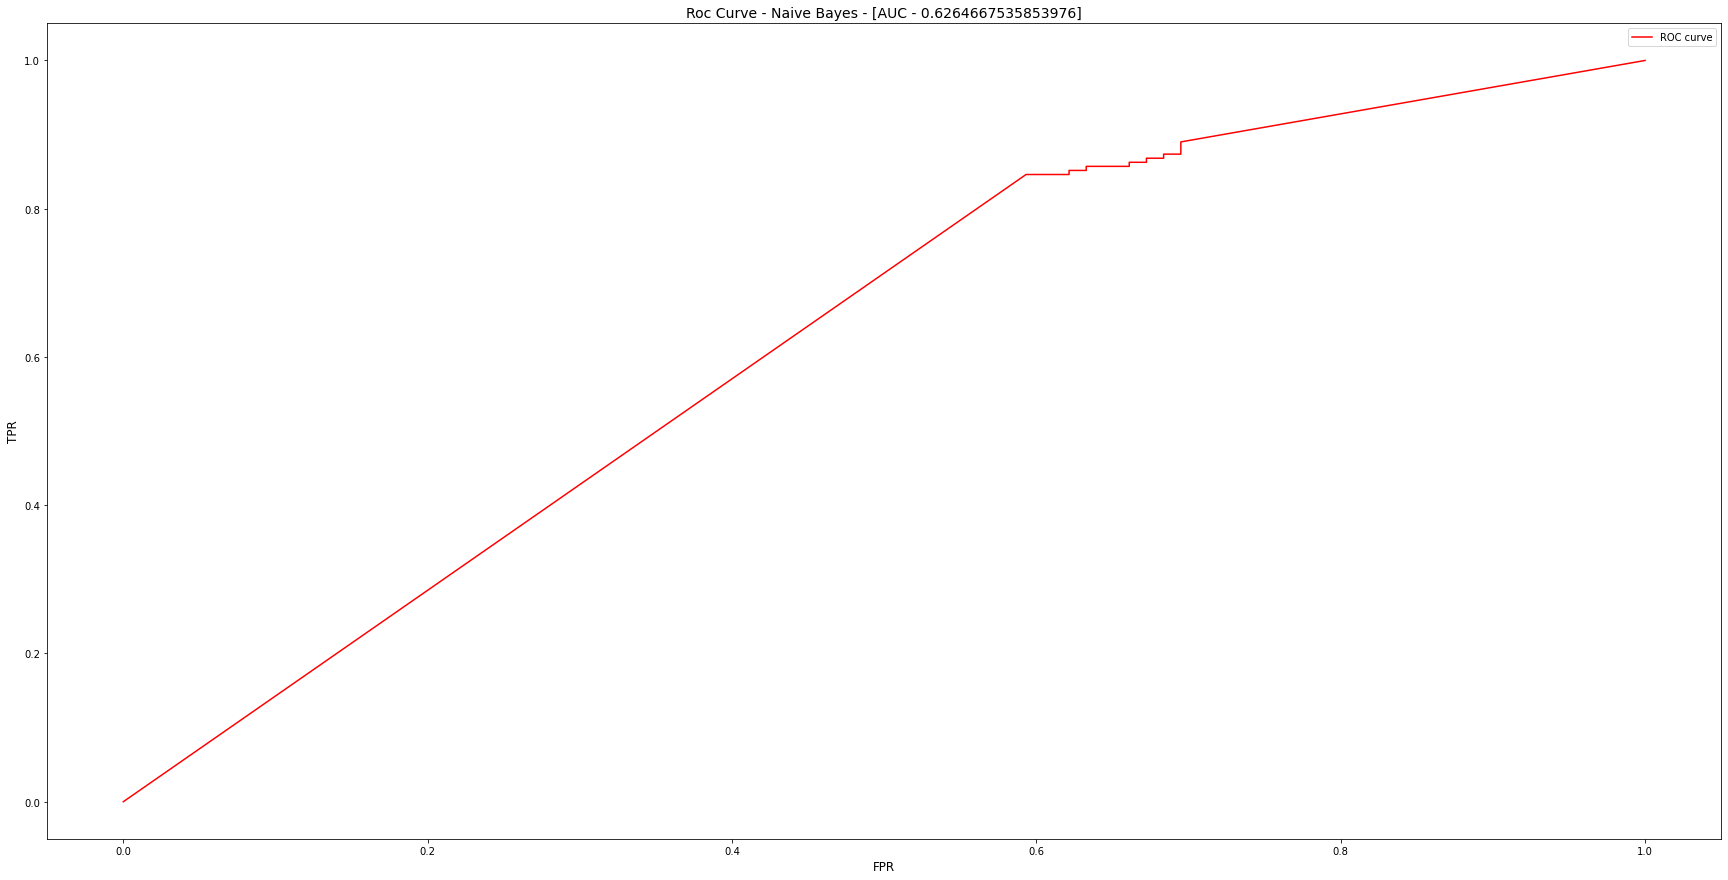

In [98]:
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_nbc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Naive Bayes - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

## Random Forest

In [99]:
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       177
           1       0.67      0.71      0.69       182

    accuracy                           0.67       359
   macro avg       0.67      0.67      0.67       359
weighted avg       0.67      0.67      0.67       359



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

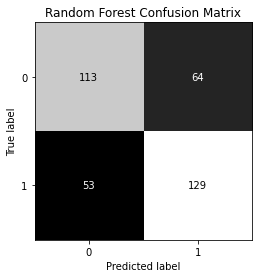

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_rfc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Random Forest Confusion Matrix")

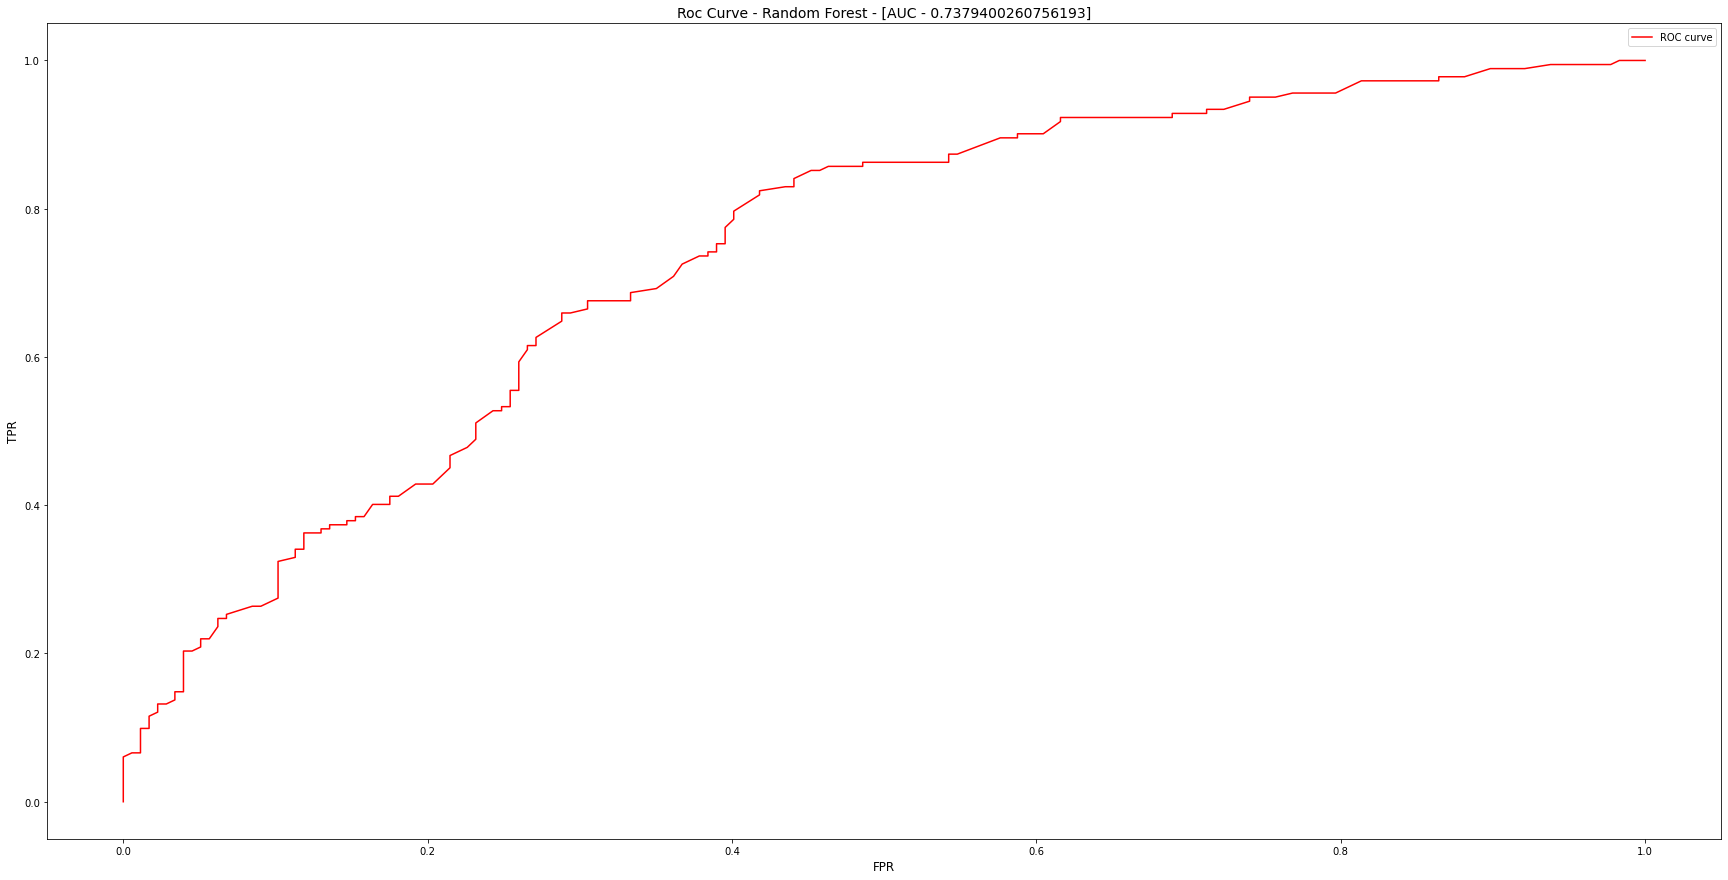

In [101]:
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_rfc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Random Forest - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()